In [19]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# sns.set()
sns.set_style("whitegrid")

In [20]:
def get_scores_df(scores_filename_list, dirname, err_param_name, train_err_param_value):
    rotation_scores_df = None
    for scores_filename in scores_filename_list:
        df = pd.read_pickle(dirname + "/" + scores_filename)
        df = df[df["train_" + err_param_name] == train_err_param_value].reset_index(drop=True)
        alt_path = dirname + "_alt/" + scores_filename
        if Path(alt_path).is_file():
            df_alt = pd.read_pickle(alt_path)
            df_alt = df_alt[df_alt["train_" + err_param_name] == train_err_param_value].reset_index(drop=True)
            df_tot = pd.concat([df, df_alt], axis=0)
            df["accuracy"] = df_tot.groupby("test_" + err_param_name)["accuracy"].mean().values
        rotation_scores_df = pd.concat([rotation_scores_df, df], axis=0)
    return rotation_scores_df.reset_index(drop=True)

In [21]:
noise_scores_filename_list = [
    "autokeras_noise_time_limit_mins_360.pkl",
    "autokeras_aug_gpu_noise_time_limit_mins_360.pkl",
    "autokeras_gpu_noise_time_limit_mins_360.pkl",
    "h2o_noise_time_limit_mins_360.pkl",
    "tpot_noise_time_limit_mins_360.pkl",
]

           model_name  train_std  test_std  accuracy
0           autokeras        0.0       0.0    0.9140
1           autokeras        0.0      51.0    0.3960
2           autokeras        0.0     102.0    0.2000
3           autokeras        0.0     153.0    0.1410
4           autokeras        0.0     204.0    0.1380
5           autokeras        0.0     255.0    0.1290
6   autokeras_aug_gpu        0.0       0.0    0.9150
7   autokeras_aug_gpu        0.0      51.0    0.3040
8   autokeras_aug_gpu        0.0     102.0    0.1585
9   autokeras_aug_gpu        0.0     153.0    0.1355
10  autokeras_aug_gpu        0.0     204.0    0.1250
11  autokeras_aug_gpu        0.0     255.0    0.1235
12      autokeras_gpu        0.0       0.0    0.9060
13      autokeras_gpu        0.0      51.0    0.6825
14      autokeras_gpu        0.0     102.0    0.2830
15      autokeras_gpu        0.0     153.0    0.1945
16      autokeras_gpu        0.0     204.0    0.1645
17      autokeras_gpu        0.0     255.0    

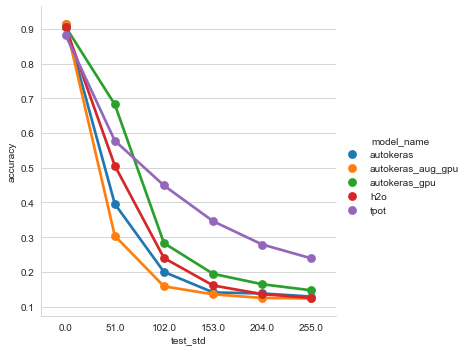

In [22]:
noise_scores_df = get_scores_df(noise_scores_filename_list, "scores_fashion_noise", "std", 0)
print(noise_scores_df)
sns.catplot(x="test_std", y="accuracy", hue="model_name", kind="point", data=noise_scores_df)
plt.show()

           model_name  train_std  test_std  accuracy
0           autokeras      102.0       0.0    0.8360
1           autokeras      102.0      51.0    0.8430
2           autokeras      102.0     102.0    0.8150
3           autokeras      102.0     153.0    0.6900
4           autokeras      102.0     204.0    0.4520
5           autokeras      102.0     255.0    0.3010
6   autokeras_aug_gpu      102.0       0.0    0.7435
7   autokeras_aug_gpu      102.0      51.0    0.8370
8   autokeras_aug_gpu      102.0     102.0    0.8450
9   autokeras_aug_gpu      102.0     153.0    0.6255
10  autokeras_aug_gpu      102.0     204.0    0.2440
11  autokeras_aug_gpu      102.0     255.0    0.1355
12      autokeras_gpu      102.0       0.0    0.8175
13      autokeras_gpu      102.0      51.0    0.8285
14      autokeras_gpu      102.0     102.0    0.8120
15      autokeras_gpu      102.0     153.0    0.6170
16      autokeras_gpu      102.0     204.0    0.3290
17      autokeras_gpu      102.0     255.0    

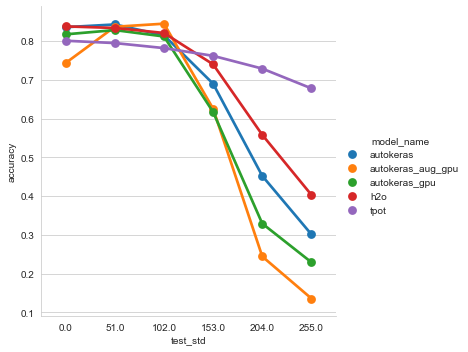

In [23]:
noise_scores_df = get_scores_df(noise_scores_filename_list, "scores_fashion_noise", "std", 102)
print(noise_scores_df)
sns.catplot(x="test_std", y="accuracy", hue="model_name", kind="point", data=noise_scores_df)
plt.show()

In [24]:
rotation_scores_filename_list = [
    "autokeras_rotation_time_limit_mins_360.pkl",
    "autokeras_aug_gpu_rotation_time_limit_mins_360.pkl",
    "autokeras_gpu_rotation_time_limit_mins_360.pkl",
    "h2o_rotation_time_limit_mins_360.pkl",
    "tpot_rotation_time_limit_mins_360.pkl",
]

           model_name  train_max_angle  test_max_angle  accuracy
0           autokeras              0.0             0.0    0.9100
1           autokeras              0.0            36.0    0.5770
2           autokeras              0.0            72.0    0.3740
3           autokeras              0.0           108.0    0.2740
4           autokeras              0.0           144.0    0.2410
5           autokeras              0.0           180.0    0.2410
6   autokeras_aug_gpu              0.0             0.0    0.9450
7   autokeras_aug_gpu              0.0            36.0    0.5970
8   autokeras_aug_gpu              0.0            72.0    0.3785
9   autokeras_aug_gpu              0.0           108.0    0.2975
10  autokeras_aug_gpu              0.0           144.0    0.2735
11  autokeras_aug_gpu              0.0           180.0    0.2775
12      autokeras_gpu              0.0             0.0    0.9250
13      autokeras_gpu              0.0            36.0    0.5635
14      autokeras_gpu    

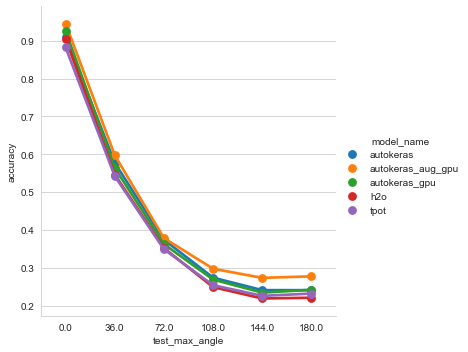

In [25]:
rotation_scores_df = get_scores_df(rotation_scores_filename_list, "scores_fashion_rotation", "max_angle", 0)
print(rotation_scores_df)
sns.catplot(x="test_max_angle", y="accuracy", hue="model_name", kind="point", data=rotation_scores_df, )
plt.show()

           model_name  train_max_angle  test_max_angle  accuracy
0           autokeras            180.0             0.0    0.8200
1           autokeras            180.0            36.0    0.8090
2           autokeras            180.0            72.0    0.8020
3           autokeras            180.0           108.0    0.8030
4           autokeras            180.0           144.0    0.8050
5           autokeras            180.0           180.0    0.8070
6   autokeras_aug_gpu            180.0             0.0    0.8805
7   autokeras_aug_gpu            180.0            36.0    0.8795
8   autokeras_aug_gpu            180.0            72.0    0.8800
9   autokeras_aug_gpu            180.0           108.0    0.8770
10  autokeras_aug_gpu            180.0           144.0    0.8760
11  autokeras_aug_gpu            180.0           180.0    0.8765
12      autokeras_gpu            180.0             0.0    0.8390
13      autokeras_gpu            180.0            36.0    0.8305
14      autokeras_gpu    

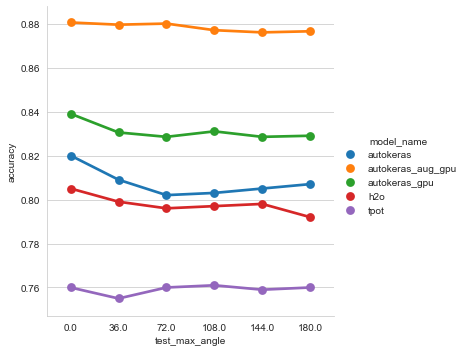

In [26]:
rotation_scores_df = get_scores_df(rotation_scores_filename_list, "scores_fashion_rotation", "max_angle", 180)
print(rotation_scores_df)
sns.catplot(x="test_max_angle", y="accuracy", hue="model_name", kind="point", data=rotation_scores_df, )
plt.show()

In [27]:
noise_scores_filename_list = [
    "h2o_noise_time_limit_mins_60.pkl",
    "tpot_noise_time_limit_mins_60.pkl",
]

               model_name  train_std  test_std  accuracy
0    h2o_clean_train_data        0.0       0.0     0.987
1    h2o_clean_train_data        0.0       3.0     0.889
2    h2o_clean_train_data        0.0       6.0     0.676
3    h2o_clean_train_data        0.0      10.0     0.442
4    h2o_clean_train_data        0.0      13.0     0.282
5    h2o_clean_train_data        0.0      16.0     0.280
6   tpot_clean_train_data        0.0       0.0     0.982
7   tpot_clean_train_data        0.0       3.0     0.976
8   tpot_clean_train_data        0.0       6.0     0.873
9   tpot_clean_train_data        0.0      10.0     0.633
10  tpot_clean_train_data        0.0      13.0     0.449
11  tpot_clean_train_data        0.0      16.0     0.382
               model_name  train_std  test_std  accuracy
0    h2o_dirty_train_data        6.0       0.0     0.973
1    h2o_dirty_train_data        6.0       3.0     0.953
2    h2o_dirty_train_data        6.0       6.0     0.840
3    h2o_dirty_train_data      

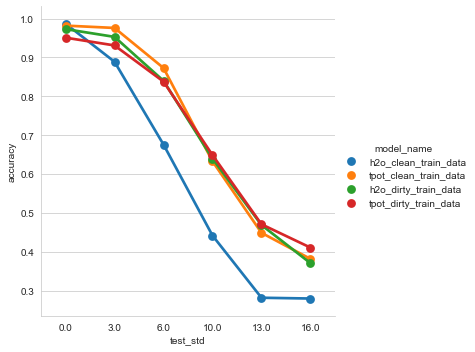

In [31]:
noise_scores_df_clean = get_scores_df(noise_scores_filename_list, "scores_digits_noise", "std", 0)
noise_scores_df_clean["model_name"] = noise_scores_df_clean["model_name"] + "_clean_train_data"
print(noise_scores_df_clean)
noise_scores_df_dirty = get_scores_df(noise_scores_filename_list, "scores_digits_noise", "std", 6)
noise_scores_df_dirty["model_name"] = noise_scores_df_dirty["model_name"] + "_dirty_train_data"
print(noise_scores_df_dirty)
noise_scores_df = pd.concat([noise_scores_df_clean, noise_scores_df_dirty], axis=0)
sns.catplot(x="test_std", y="accuracy", hue="model_name", kind="point", data=noise_scores_df)
plt.show()

In [29]:
rotation_scores_filename_list = [
    "h2o_rotation_time_limit_mins_60.pkl",
    "tpot_rotation_time_limit_mins_60.pkl",
]

               model_name  train_max_angle  test_max_angle  accuracy
0    h2o_clean_train_data              0.0             0.0     0.987
1    h2o_clean_train_data              0.0            36.0     0.729
2    h2o_clean_train_data              0.0            72.0     0.429
3    h2o_clean_train_data              0.0           108.0     0.349
4    h2o_clean_train_data              0.0           144.0     0.262
5    h2o_clean_train_data              0.0           180.0     0.278
6   tpot_clean_train_data              0.0             0.0     0.982
7   tpot_clean_train_data              0.0            36.0     0.742
8   tpot_clean_train_data              0.0            72.0     0.513
9   tpot_clean_train_data              0.0           108.0     0.400
10  tpot_clean_train_data              0.0           144.0     0.351
11  tpot_clean_train_data              0.0           180.0     0.340
               model_name  train_max_angle  test_max_angle  accuracy
0    h2o_dirty_train_data         

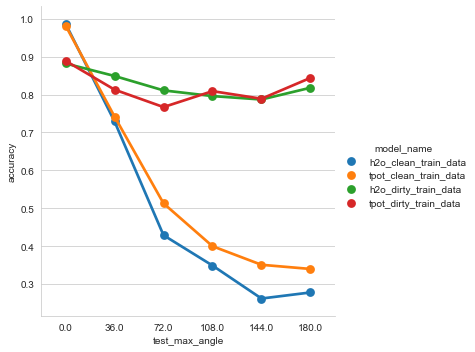

In [32]:
rotation_scores_df_clean = get_scores_df(rotation_scores_filename_list, "scores_digits_rotation", "max_angle", 0)
rotation_scores_df_clean["model_name"] = rotation_scores_df_clean["model_name"] + "_clean_train_data"
print(rotation_scores_df_clean)
rotation_scores_df_dirty = get_scores_df(rotation_scores_filename_list, "scores_digits_rotation", "max_angle", 180)
rotation_scores_df_dirty["model_name"] = rotation_scores_df_dirty["model_name"] + "_dirty_train_data"
print(rotation_scores_df_dirty)
rotation_scores_df = pd.concat([rotation_scores_df_clean, rotation_scores_df_dirty], axis=0)
sns.catplot(x="test_max_angle", y="accuracy", hue="model_name", kind="point", data=rotation_scores_df)
plt.show()